there are 5 lora experiments and 10 lorsa experiments within bounds


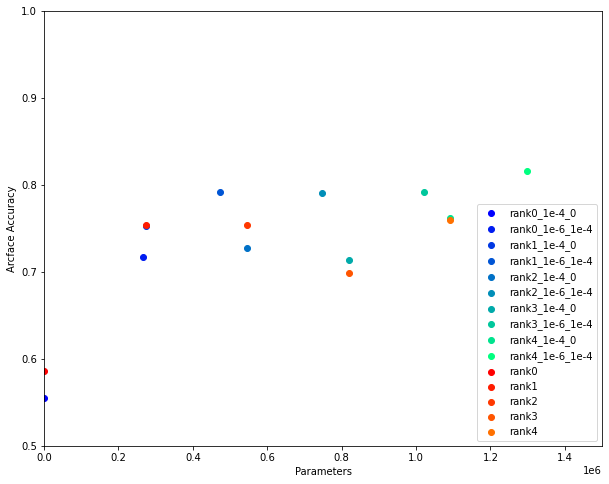

In [49]:


file = open('output.txt', 'r')
output = file.read()

data = {}
rows = output.split('\n')
for row in rows:
    if 'scores' in row:
        words = row.split(' ')
        pathpieces = words[2].split('/')
        name = pathpieces[5]
        score = float(words[-1])
        if name in data.keys():
            data[name]['score'] = score
        else:
            data[name] = {'score': score}
    elif '.pth' in row:
        words = row.split(' ')
        size = int(words[0])
        pathpieces = words[1].split('/')
        name = pathpieces[5]
        if name in data.keys():
            data[name]['size'] = size
        else:
            data[name] = {'size': size}

# unroll the dictionary into parallel lists
names = sorted(data.keys())
scores = []
sizes = []
for key in names:
    scores.append(data[key]['score'])
    sizes.append(data[key]['size'])

# separate the lists for lora vs lorsa
loranames = []
lorascores = []
lorasizes = []
lorsanames = []
lorsascores = []
lorsasizes = []
# filter bounds for score and size
scorelowerbound = 0.5
sizeupperbound = 1.5e6
for i in range(len(names)):
    if scores[i] < scorelowerbound:
        continue
    if sizes[i] > sizeupperbound:
        continue
    if 'LoRSA' in names[i]:
        # Actually shorten the name so it's more reasonable to put in the plot legend
        newname = 'rank' + '_'.join(names[i].split('_B')[1].split('_')[:-1])
        lorsanames.append(newname)
        lorsascores.append(scores[i])
        lorsasizes.append(sizes[i])
    else:
        newname = 'rank' + '_'.join(names[i].split('_B')[1].split('_')[:-1])
        loranames.append(newname)
        lorascores.append(scores[i])
        lorasizes.append(sizes[i])

print(f'there are {len(loranames)} lora experiments and {len(lorsanames)} lorsa experiments within bounds')



import matplotlib.pyplot as plt

import numpy as np
import matplotlib.cm as cm
plt.rcParams["figure.figsize"] = (10,8)

colors = cm.winter(np.linspace(0, 1, len(lorsanames)))
for i in range(len(lorsanames)):
    plt.scatter(lorsasizes[i], lorsascores[i], label=lorsanames[i], color=colors[i])
colors = cm.autumn(np.linspace(0, 1, len(loranames)*2))
for i in range(len(loranames)):
    plt.scatter(lorasizes[i], lorascores[i], label=loranames[i], color=colors[i])
plt.ylabel("Arcface Accuracy")
plt.xlim(0, sizeupperbound)
plt.ylim(scorelowerbound, 1)
plt.legend()
plt.xlabel("Parameters")
plt.show()

### Coding scratchpad

In [38]:
name = '8101_EDLoRSA_potter_Cmix_B1_1e-4_0_Repeat500'
shrinkage = 1e-4
shrinkagestr = f'{shrinkage:.0e}'
# annoying process to remove leading 0s from the exponent
if '0' in shrinkagestr.split('e')[-1]:
    pieces = shrinkagestr.split('0')
    shrinkagestr = ''.join(pieces)
print(shrinkagestr)
pieces = name.split(shrinkagestr)
print(pieces)
newshrinkage = '1e-3'
newname = pieces[0] + newshrinkage + pieces[1]
print(newname)

1e-4
['8101_EDLoRSA_potter_Cmix_B1_', '_0_Repeat500']
8101_EDLoRSA_potter_Cmix_B1_1e-3_0_Repeat500
